# **Práctica Redes Neuronales Convolucionales MultiClase Imagenes**

**Desarrollado por:** Michael Israel Lata Zambrano , John Michael Franco Naulaguari  

**Correo:** mlataz@est.ups.edu.ec, jfrancon@est.ups.edu.ec

---

### **Introducción**

En la actualidad, el reconocimiento y la clasificación automática de imágenes se han convertido en tareas fundamentales dentro del campo de la inteligencia artificial, especialmente gracias al avance de las redes neuronales convolucionales (CNN). Estas arquitecturas han demostrado una notable capacidad para extraer y aprender características relevantes de imágenes, permitiendo resolver problemas complejos en áreas como la visión por computadora.

En este proyecto se explora el uso de redes neuronales convolucionales para la clasificación de imágenes, utilizando como caso de estudio el dataset Food-101, que contiene una amplia variedad de imágenes de alimentos organizadas en diferentes categorías. A través de la implementación y experimentación con modelos de CNN, se busca comprender el proceso de preprocesamiento, entrenamiento y evaluación de redes profundas, así como analizar los resultados obtenidos y sus posibles aplicaciones en la vida real.

El objetivo principal es familiarizarse con las técnicas modernas de aprendizaje profundo aplicadas a la visión artificial, desarrollando habilidades prácticas en el diseño, ajuste y validación de modelos de clasificación de imágenes.




## **1.Descripción**  



### 1.1 **Fundamentos Teóricos**

Las redes neuronales convolucionales (CNN, por sus siglas en inglés) son una clase de modelos de aprendizaje profundo diseñados específicamente para procesar datos con una estructura en forma de cuadrícula, como las imágenes. Su arquitectura se inspira en el funcionamiento del córtex visual de los animales, permitiendo la extracción automática y jerárquica de características relevantes.

Las CNN están compuestas principalmente por varios tipos de capas:

- **Capas convolucionales:** Aplican filtros o kernels que recorren la imagen para detectar patrones locales, como bordes, texturas o formas. Cada filtro aprende a identificar una característica específica durante el entrenamiento.
- **Capas de activación:** Introducen no linealidades en el modelo, siendo la función ReLU (Rectified Linear Unit) la más utilizada, lo que permite a la red aprender representaciones complejas.
- **Capas de pooling:** Reducen la dimensionalidad de las representaciones intermedias, conservando la información más relevante y disminuyendo el costo computacional. El pooling más común es el max pooling.
- **Capas completamente conectadas:** Al final de la red, estas capas integran la información extraída para realizar la clasificación o regresión.

El entrenamiento de una CNN se realiza mediante algoritmos de optimización como el descenso por gradiente, ajustando los pesos de los filtros para minimizar una función de pérdida. El uso de técnicas como la normalización, regularización y aumento de datos contribuye a mejorar la generalización del modelo.

Las CNN han revolucionado el campo de la visión por computadora, logrando resultados sobresalientes en tareas como clasificación de imágenes, detección de objetos y segmentación, entre otras.




### 1.2 Descripción del problema y del dataset

**Problema:**  
El objetivo de este proyecto es abordar la clasificación multiclase de imágenes utilizando redes neuronales convolucionales (CNN). Se busca entrenar un modelo capaz de identificar correctamente el tipo de alimento presente en una imagen, seleccionando entre 101 posibles categorías. Esta tarea es representativa de los desafíos actuales en visión por computadora, donde la variabilidad visual y la similitud entre clases requieren modelos robustos y eficientes.

**Dataset: Food-101**  
- **Nombre:** Food-101  
- **Fuente:** ETH Zurich  
- **Acceso:** Disponible en el sitio oficial y a través de TensorFlow Datasets (tfds).  
- **Número total de imágenes:** 101,000  
- **División:**  
  - Entrenamiento: 75,750 imágenes (750 por clase)  
  - Prueba: 25,250 imágenes (250 por clase)  
- **Número de clases:** 101 (cada clase representa un platillo diferente, como “spaghetti bolognese”, “sushi”, “apple pie”, etc.)  
- **Dimensiones de las imágenes:** Varían, pero suelen redimensionarse a 224x224 o 299x299 píxeles para su uso en modelos CNN estándar.  
- **Formato de las etiquetas:** String (nombre del platillo).  
- **Ejemplo de clases:**  
  - pizza  
  - pad_thai  
  - guacamole  
  - chicken_curry  
  - ramen  
  - etc.



### 1.3 Preparación del dataset

Para entrenar un modelo de clasificación de imágenes con CNN, es fundamental realizar una adecuada preparación del dataset. Los pasos principales incluyen:

- **Descarga y carga de datos:** El dataset Food-101 puede descargarse manualmente desde el sitio oficial o automáticamente mediante librerías como TensorFlow Datasets (`tfds`), lo que facilita su integración en flujos de trabajo de deep learning.
- **División en conjuntos:** El dataset ya viene predividido en conjuntos de entrenamiento y prueba, asegurando una evaluación objetiva del modelo.
- **Redimensionamiento de imágenes:** Las imágenes originales presentan diferentes dimensiones, por lo que se redimensionan a un tamaño estándar (por ejemplo, 224x224 píxeles) para ser compatibles con las arquitecturas CNN más utilizadas.
- **Normalización:** Los valores de los píxeles se escalan normalmente al rango [0, 1] o se estandarizan para mejorar la estabilidad y velocidad del entrenamiento.
- **Codificación de etiquetas:** Las etiquetas, que son cadenas de texto, se convierten a formato numérico (one-hot encoding o integer encoding) para ser utilizadas por el modelo.
- **Aumento de datos (data augmentation):** Se aplican técnicas como rotaciones, traslaciones, volteos y cambios de brillo para incrementar la diversidad del conjunto de entrenamiento y mejorar la capacidad de generalización del modelo.

Esta preparación garantiza que los datos estén en el formato adecuado y que el modelo pueda aprender de manera eficiente y precisa a partir de las imágenes proporcionadas.



In [1]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
print('importadas')

importadas


## **2.Analisis Exploratorio/Visualizacion de Imagenes**  


#### Visualización de un tensor RGB aleatorio

En este bloque de código se genera y visualiza una imagen sintética utilizando un tensor tridimensional que simula una imagen en formato RGB (rojo, verde, azul). El objetivo es ilustrar cómo se representan y visualizan los datos de imágenes en redes neuronales convolucionales.

- Se utiliza la librería NumPy para crear un tensor de dimensiones 6x6x3, donde 6x6 corresponde a la resolución de la imagen y 3 a los canales de color (R, G, B).
- Los valores de cada canal se generan aleatoriamente entre 0 y 255, que es el rango habitual para imágenes en formato RGB.
- Se fija una semilla aleatoria para asegurar la reproducibilidad de los resultados.
- Finalmente, se utiliza Matplotlib para mostrar la imagen generada a partir del tensor.

**Resultado esperado:**  
Se visualizará una imagen pequeña (6x6 píxeles) con colores aleatorios, demostrando cómo los tensores numéricos pueden convertirse en imágenes y cómo se manipulan los datos de entrada en tareas de visión por computadora.



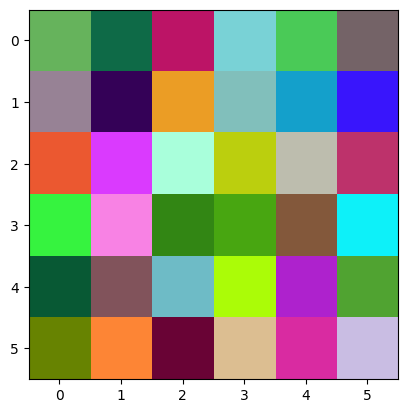

In [2]:
#RGB: rojo, verde, azul

#Librería para visualizar la imagen
import numpy as np
import matplotlib.pyplot as plt

#Fijamos la semilla del generador de valores aleatorios
np.random.seed(42)

#256 indica que se crean valores entre 0 y 255
A = np.random.randint(256, size=(6,6,3))

#Visualizamos el tensor A
plt.imshow(A)

#print(A)
#print(type(A))

In [3]:
# Se descomprime el archivo
import tarfile

with tarfile.open("food-101.tar.gz", "r:gz") as tar:
    tar.extractall()



#### Visualización y exploración de imágenes del dataset Food-101

En este bloque de código se realiza la carga y visualización de imágenes reales del dataset Food-101, permitiendo explorar sus características y etiquetas asociadas. El objetivo es familiarizarse con la estructura de los datos y comprobar cómo se almacenan y acceden las imágenes y sus clases.

- Se utiliza TensorFlow para cargar las imágenes desde el directorio correspondiente, organizándolas en un dataset compatible con modelos de deep learning.
- Las imágenes se redimensionan a 100x100 píxeles y se cargan en lotes de tamaño 1, lo que facilita el acceso individual a cada imagen.
- Se obtiene la lista de nombres de las clases presentes en el dataset.
- Se define una función que permite visualizar una imagen específica del dataset, mostrando su forma, valores mínimo y máximo de los píxeles, el identificador de la etiqueta y el nombre de la clase correspondiente.
- Finalmente, se muestra la imagen seleccionada junto con su clase, permitiendo una inspección visual directa.

**Resultado esperado:**  
Se imprimen en pantalla las características de la imagen seleccionada (por ejemplo, la número 10), incluyendo su forma, valores de píxeles y clase. Además, se visualiza la imagen con su etiqueta, facilitando la comprensión del formato y contenido del dataset Food-101.



Found 101000 files belonging to 101 classes.
Imagen 10
Forma (shape): (100, 100, 3)
Valor mínimo: 0.0, máximo: 255.0
Etiqueta ID: 0 - Clase: apple_pie


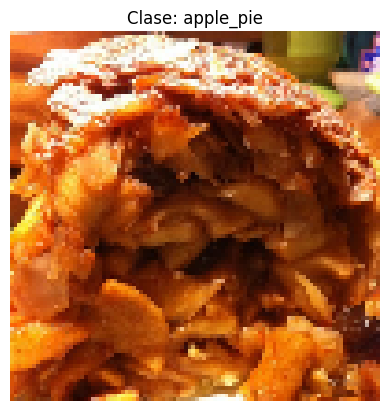

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Ruta al directorio donde están las imágenes
data_dir = "food-101\images"  # ← cambia esto a tu ruta

# Cargar el dataset (puedes ajustar el tamaño del lote)
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(100, 100),
    batch_size=1,  # importante para acceder imagen por imagen
    shuffle=False
)

# Obtener los nombres de clases
class_names = ds.class_names

# Función para visualizar una imagen específica del dataset
def display_food101_image(dataset, sample_id):
    """
    Muestra las características de una imagen del dataset Food-101
    """
    i = 0
    for image, label in dataset:
        if i == sample_id:
            print(f"Imagen {sample_id}")
            print(f"Forma (shape): {image.numpy()[0].shape}")
            print(f"Valor mínimo: {np.min(image.numpy())}, máximo: {np.max(image.numpy())}")
            print(f"Etiqueta ID: {label.numpy()[0]} - Clase: {class_names[label.numpy()[0]]}")
            plt.imshow(image.numpy()[0].astype("uint8"))
            plt.axis("off")
            plt.title(f"Clase: {class_names[label.numpy()[0]]}")
            plt.show()
            break
        i += 1

# Usar la función con, por ejemplo, la imagen número 10
display_food101_image(ds, sample_id=10)



#### Visualización de una imagen específica del dataset Food-101

En este bloque de código se muestra cómo acceder y visualizar una imagen concreta del dataset Food-101, en este caso la imagen número 9999, sin mezclar el orden original de los datos.

- Se define el identificador de la muestra (`sample_id = 9999`) para seleccionar la imagen deseada.
- Se carga nuevamente el dataset desde el directorio de imágenes, redimensionando cada imagen a 224x224 píxeles y asegurando que no se mezclen (shuffle=False), lo que permite acceder a imágenes por su índice original.
- Se utiliza la función previamente definida para mostrar la imagen seleccionada, junto con su información relevante (forma, valores de píxeles, etiqueta y clase).

**Resultado esperado:**  
Se visualizará la imagen número 9999 del dataset, mostrando en pantalla sus características y la clase a la que pertenece. Esto permite inspeccionar ejemplos concretos y verificar la correcta carga y organización de los datos.



Found 101000 files belonging to 101 classes.
Imagen 9999
Forma (shape): (224, 224, 3)
Valor mínimo: 0.0, máximo: 255.0
Etiqueta ID: 9 - Clase: breakfast_burrito


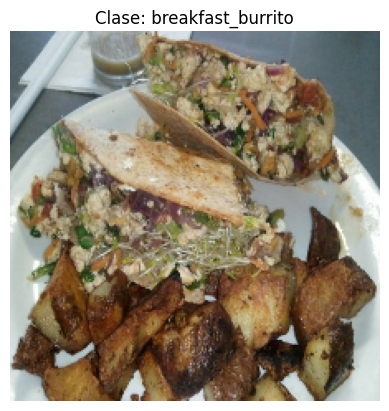

In [5]:
# Mostrar la imagen número 9999 del dataset (en orden sin shuffle)
sample_id = 9999

# Cargar dataset (sin mezclar)
ds = tf.keras.utils.image_dataset_from_directory(
    "food-101/images",  # reemplaza con tu ruta real
    image_size=(224, 224),
    batch_size=1,
    shuffle=False
)

# Usar función adaptada
display_food101_image(ds, sample_id=sample_id)


## **3.Entrenamiento y optimizacion de una red neuronal**  



#### Carga y preparación de los datos para entrenamiento y validación

En este bloque de código se implementa una función para cargar y preparar el dataset Food-101, dividiéndolo en conjuntos de entrenamiento y validación, y normalizando las imágenes para su uso en modelos de redes neuronales convolucionales.

- Se utiliza TensorFlow para cargar las imágenes desde el directorio especificado, dividiendo automáticamente el dataset en un 80% para entrenamiento y un 20% para validación mediante el parámetro `validation_split`.
- Las imágenes se redimensionan a un tamaño estándar (por ejemplo, 100x100 píxeles) y se agrupan en lotes (`batch_size`) para optimizar el entrenamiento.
- Se aplica una capa de normalización para escalar los valores de los píxeles al rango [0, 1], lo que mejora la estabilidad y eficiencia del aprendizaje.
- El conjunto de entrenamiento se mezcla (shuffle) para favorecer la generalización del modelo.
- Finalmente, se imprime un ejemplo de las clases presentes y el número total de categorías en el dataset.

**Resultado esperado:**  
Se obtienen dos conjuntos de datos listos para ser utilizados en el entrenamiento y validación de una red neuronal, junto con la lista de clases disponibles. Esto sienta las bases para construir y entrenar modelos de clasificación de imágenes de manera eficiente y reproducible.



In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def load_food101_data(path, image_size=(100, 100), batch_size=32):
    # Carga con división train/validation
    train_ds_raw = tf.keras.utils.image_dataset_from_directory(
        path,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=image_size,
        batch_size=batch_size
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        path,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=image_size,
        batch_size=batch_size
    )

    # Normalizar imágenes (de 0-255 a 0-1)
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    train_ds = train_ds_raw.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

    # Shuffle en entrenamiento para mejor generalización
    train_ds = train_ds.shuffle(1000)

    return train_ds, val_ds, train_ds_raw.class_names

# Ruta a tu dataset (ajusta esta ruta)
path = "food-101/images"

# Carga datos
train_ds, val_ds, class_names = load_food101_data(path, image_size=(100, 100), batch_size=64)

# Verifica las clases
print("Clases (ejemplo):", class_names[:10])
print("Número total clases:", len(class_names))

Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.
Clases (ejemplo): ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
Número total clases: 101


In [18]:
# Obtener el shape de las imágenes del dataset
for images, labels in train_ds.take(1):
    input_shape = images.shape[1:]  # Ignora el batch size
    print("Input shape:", input_shape)


Input shape: (100, 100, 3)



#### Definición y compilación del modelo de red neuronal convolucional (CNN)

En este bloque de código se construye y compila un modelo de red neuronal convolucional profunda utilizando Keras (TensorFlow), diseñado para la clasificación multiclase de imágenes del dataset Food-101.

- Se utiliza el modelo `Sequential` para apilar capas de manera lineal.
- El modelo incluye varias capas convolucionales (`Conv2D`) con activación ReLU y normalización por lotes (`BatchNormalization`) para mejorar la estabilidad y velocidad del entrenamiento.
- Se emplean capas de agrupamiento máximo (`MaxPooling2D`) para reducir la dimensionalidad y capas de abandono (`Dropout`) para prevenir el sobreajuste.
- Tras extraer las características, se aplana la salida (`Flatten`) y se conecta a una capa densa de 512 neuronas, seguida de una capa de salida con activación softmax para la clasificación en múltiples clases.
- El modelo se compila usando la función de pérdida `sparse_categorical_crossentropy`, el optimizador Adam y la métrica de precisión (`accuracy`).
- Se definen dos callbacks: `EarlyStopping` para detener el entrenamiento si la pérdida de validación no mejora, y `ModelCheckpoint` para guardar el mejor modelo basado en la precisión de validación.

**Resultado esperado:**  
Se obtiene un modelo CNN robusto y listo para ser entrenado sobre el dataset Food-101, con mecanismos para evitar el sobreajuste y guardar automáticamente la mejor versión del modelo durante el proceso de entrenamiento.



In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(len(class_names), activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("modelo_mejorado.h5", monitor='val_accuracy', save_best_only=True)


#### Entrenamiento del modelo CNN

En este bloque de código se entrena el modelo de red neuronal convolucional previamente definido utilizando los conjuntos de datos de entrenamiento y validación.

- Se utiliza el método `fit` para ajustar el modelo a los datos de entrenamiento (`train_ds`) durante un número determinado de épocas (en este caso, 8).
- Se evalúa el desempeño del modelo en cada época utilizando el conjunto de validación (`val_ds`).
- El parámetro `verbose=1` permite visualizar el progreso del entrenamiento en la consola.
- Se emplean los callbacks `EarlyStopping` y `ModelCheckpoint` para detener el entrenamiento si la pérdida de validación deja de mejorar y para guardar automáticamente el mejor modelo alcanzado.

**Resultado esperado:**  
El modelo se entrena durante varias épocas, mostrando la evolución de la pérdida y la precisión tanto en entrenamiento como en validación. Al finalizar, se dispone del mejor modelo guardado y se evitan entrenamientos innecesarios si el modelo deja de mejorar.



In [31]:
history = model.fit(
    train_ds,
    epochs=8,
    validation_data=val_ds,
    verbose=1,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/8
1263/1263 [==============================] - 105s 72ms/step - loss: 1.1080 - accuracy: 0.6832 - val_loss: 2.7699 - val_accuracy: 0.4050
Epoch 2/8
1263/1263 [==============================] - 104s 72ms/step - loss: 1.0019 - accuracy: 0.7074 - val_loss: 2.7105 - val_accuracy: 0.4070
Epoch 3/8
1263/1263 [==============================] - 104s 72ms/step - loss: 0.9069 - accuracy: 0.7326 - val_loss: 2.8295 - val_accuracy: 0.4175
Epoch 4/8
1263/1263 [==============================] - 104s 72ms/step - loss: 0.8337 - accuracy: 0.7523 - val_loss: 2.8826 - val_accuracy: 0.4083
Epoch 5/8
1263/1263 [==============================] - 104s 72ms/step - loss: 0.7689 - accuracy: 0.7698 - val_loss: 3.0106 - val_accuracy: 0.3974
Epoch 6/8
1263/1263 [==============================] - 105s 72ms/step - loss: 0.7126 - accuracy: 0.7835 - val_loss: 3.0829 - val_accuracy: 0.3982
Epoch 7/8
1263/1263 [==============================] - 104s 72ms/step - loss: 0.6592 - accuracy: 0.7987 - val_loss: 3.0564 -

In [42]:
from tensorflow.keras.models import load_model

model = load_model("modelo_mejorado_101.h5")


## **4.Evaluacion del modelo presentando medidas de calidad**  


#### Evaluación del modelo sobre el conjunto de validación

En este bloque de código se evalúa el desempeño final del modelo CNN utilizando el conjunto de validación.

- Se utiliza el método `evaluate` para calcular la pérdida (`loss`) y la precisión (`accuracy`) del modelo sobre los datos de validación, sin mostrar el progreso detallado (`verbose=0`).
- Se extraen las métricas obtenidas y se imprimen en pantalla con formato de cuatro decimales.

**Resultado esperado:**  
Se muestran los valores finales de la pérdida y la precisión del modelo sobre el conjunto de validación, permitiendo valorar objetivamente el rendimiento alcanzado tras el entrenamiento.



In [32]:
# Evaluación directa sobre el conjunto de validación
resultados_cnn = model.evaluate(val_ds, verbose=0)

# Obtener métricas
loss_cnn, acc_cnn = resultados_cnn

print(f"Loss: {loss_cnn:.4f}")
print(f"Accuracy: {acc_cnn:.4f}")


Loss: 2.7105
Accuracy: 0.4070



#### Predicción y análisis de resultados en el conjunto de validación

En este bloque de código se generan las predicciones del modelo sobre el conjunto de validación y se organiza la información para su análisis posterior.

- Se recorren los lotes del conjunto de validación y se obtienen las predicciones del modelo para cada imagen.
- Se almacenan tanto las etiquetas reales como las predichas, convirtiéndolas a arrays de NumPy para facilitar su manipulación.
- Se crea un DataFrame de pandas que asocia la clase real y la predicción para cada imagen, permitiendo una inspección detallada de los resultados.
- Se muestran las primeras filas del DataFrame para visualizar ejemplos concretos de aciertos y errores del modelo.

**Resultado esperado:**  
Se obtiene una tabla que compara las clases reales y las predichas por el modelo para las imágenes del conjunto de validación, lo que facilita la identificación de patrones de error y el análisis cualitativo del desempeño del modelo.



In [33]:
import numpy as np
import pandas as pd

# Predicciones sobre el conjunto de validación
y_pred = []
y_real = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_real.extend(labels.numpy())

# Convertimos a arrays para análisis posterior
y_pred = np.array(y_pred)
y_real = np.array(y_real)

# Crear DataFrame de resultados
df_resultados = pd.DataFrame({
    'real': [class_names[i] for i in y_real],
    'predicción': [class_names[i] for i in y_pred]
})

display(df_resultados.head(10))


,real,predicción
0,oysters,oysters
1,french_fries,french_fries
2,strawberry_shortcake,strawberry_shortcake
3,steak,filet_mignon
4,sashimi,sashimi
5,cannoli,breakfast_burrito
6,pork_chop,baby_back_ribs
7,strawberry_shortcake,strawberry_shortcake
8,bibimbap,bibimbap
9,bruschetta,chicken_quesadilla



#### Análisis de los resultados de predicción

En la tabla presentada se comparan las clases reales y las predichas por el modelo para algunas imágenes del conjunto de validación. Se observan tanto aciertos como errores en la clasificación:

- Cuando la columna "real" coincide con "predicción" (por ejemplo, `oysters` - `oysters` o `strawberry_shortcake` - `strawberry_shortcake`), el modelo ha clasificado correctamente la imagen.
- En otros casos, el modelo confunde clases visualmente similares o relacionadas, como `steak` predicho como `filet_mignon`, o `cannoli` como `breakfast_burrito`. Estas confusiones pueden deberse a varias razones:
  - **Similitud visual:** Algunos platillos pueden compartir características visuales (color, forma, presentación), lo que dificulta su distinción incluso para humanos.
  - **Variabilidad en las imágenes:** Diferentes estilos de preparación, ángulos de toma o iluminación pueden hacer que una clase se parezca a otra.
  - **Cantidad y diversidad de datos:** Si algunas clases tienen menos ejemplos o mayor variabilidad interna, el modelo puede tener más dificultades para aprender a diferenciarlas.
  - **Capacidad del modelo:** Aunque la arquitectura utilizada es robusta, siempre existe un margen de error, especialmente en problemas multiclase con muchas categorías similares.

**Conclusión:**  
El modelo logra identificar correctamente muchas imágenes, pero también comete errores razonables, principalmente entre clases con similitudes visuales. Estos resultados son esperados en tareas de clasificación de imágenes con alta cantidad de clases y muestran la importancia de seguir ajustando el modelo, aplicar técnicas de aumento de datos y, si es posible, utilizar arquitecturas más profundas o preentrenadas para mejorar la precisión.




#### Evaluación avanzada del modelo: métricas y matriz de confusión

En este bloque de código se calculan y visualizan métricas avanzadas de desempeño para el modelo de clasificación, proporcionando una visión más detallada de su rendimiento.

- Se utilizan funciones de `scikit-learn` para calcular las principales métricas de clasificación:
  - **Accuracy:** Proporción de predicciones correctas sobre el total de muestras.
  - **Precision:** Promedio ponderado de la precisión para cada clase, que indica la proporción de verdaderos positivos entre todas las predicciones positivas.
  - **Recall:** Promedio ponderado del recall para cada clase, que mide la proporción de verdaderos positivos entre todas las muestras reales de una clase.
  - **F1 Score:** Media armónica entre precisión y recall, proporcionando una métrica equilibrada entre ambas.
- Se imprime cada métrica con cuatro decimales para facilitar la interpretación.
- Se calcula la **matriz de confusión**, que muestra el número de aciertos y errores para cada clase, permitiendo identificar patrones específicos de confusión entre categorías.
- Se visualiza la matriz de confusión como un mapa de calor usando `seaborn` y `matplotlib`, con etiquetas de clase en los ejes para facilitar el análisis visual.

**Resultado esperado:**  
Se obtiene un resumen numérico del desempeño global del modelo y una visualización detallada de cómo se distribuyen los aciertos y errores entre las diferentes clases, lo que ayuda a identificar fortalezas y debilidades específicas del modelo en la tarea de clasificación.



Accuracy : 0.4070
Precision: 0.4315
Recall   : 0.4070
F1 Score : 0.4091


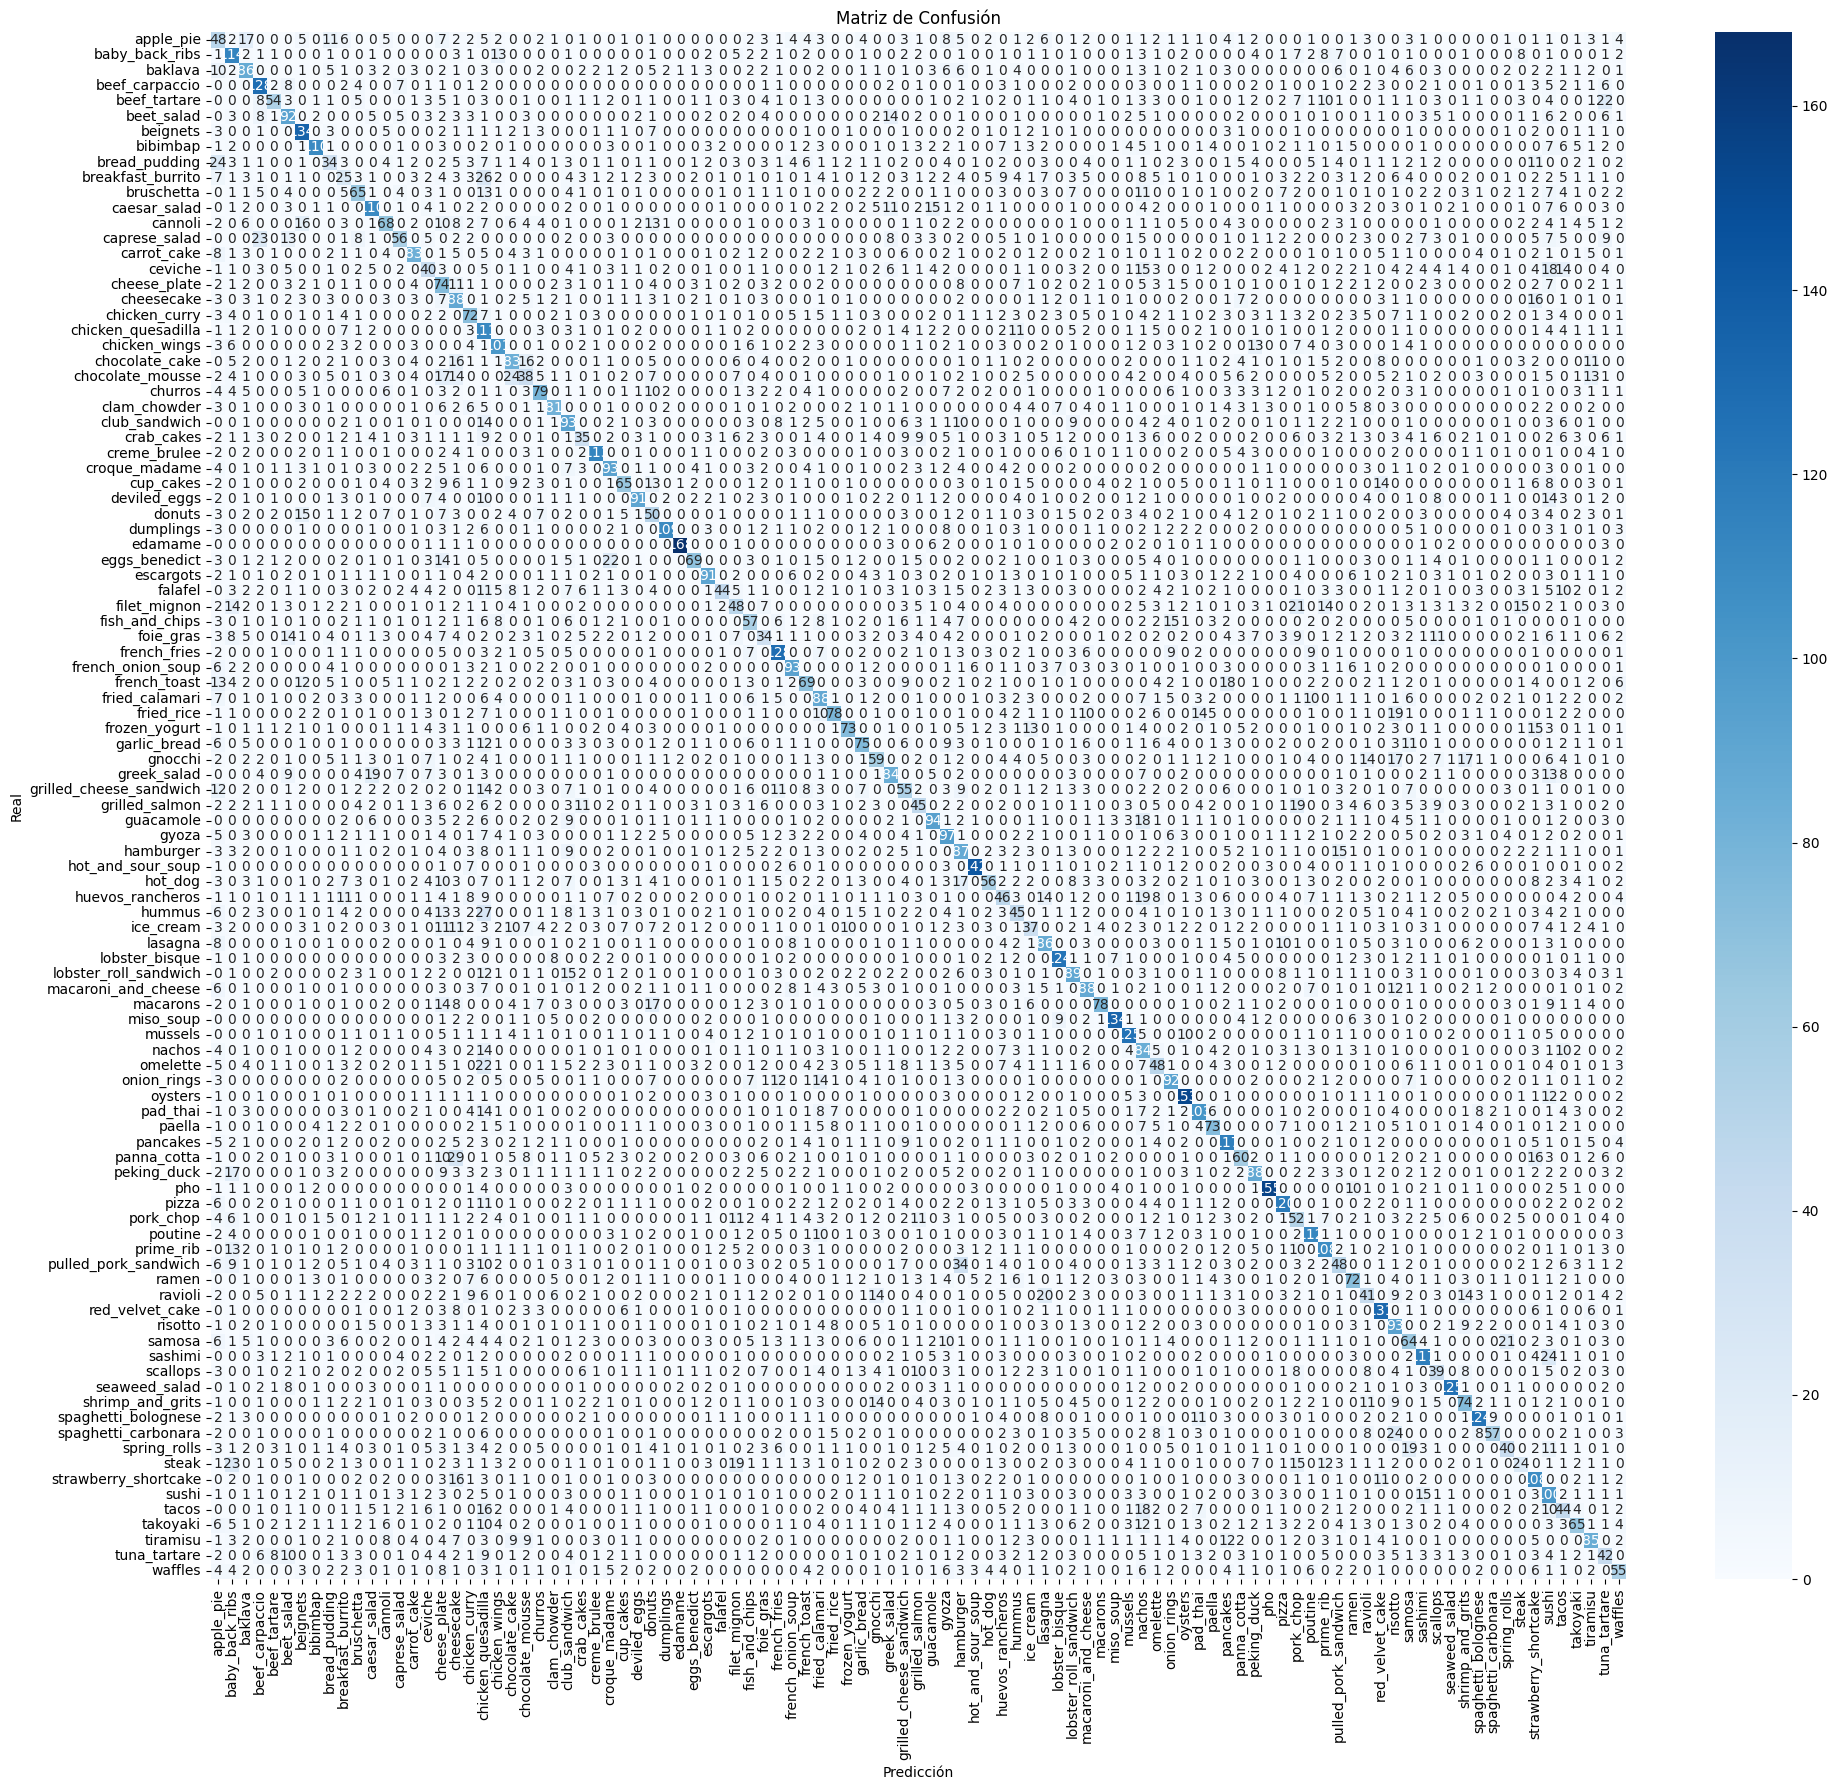

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas de clasificación
accuracy = accuracy_score(y_real, y_pred)
precision = precision_score(y_real, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_real, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_real, y_pred, average='weighted', zero_division=0)

print(f'Accuracy : {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall   : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)

plt.figure(figsize=(20, 18))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## Reporte de clasificación detallado

En este bloque de código se genera un reporte de clasificación utilizando la función `classification_report` de scikit-learn.

- El reporte muestra, para cada clase, métricas clave como precisión (precision), exhaustividad (recall), F1-score y el soporte (número de muestras reales de cada clase).
- Se utiliza la lista de nombres de clases (`class_names`) para que el reporte sea más legible.
- El parámetro `zero_division=0` evita errores en caso de que alguna clase no tenga predicciones.

**Resultado esperado:**  
Se imprime una tabla detallada que permite analizar el desempeño del modelo en cada clase individual, identificando cuáles categorías se clasifican mejor y cuáles presentan más dificultades. Esto es útil para detectar posibles sesgos o áreas de mejora en el modelo.



In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_real, y_pred, target_names=class_names, zero_division=0))


                         precision    recall  f1-score   support

              apple_pie       0.15      0.23      0.18       205
         baby_back_ribs       0.39      0.53      0.45       215
                baklava       0.39      0.40      0.40       213
         beef_carpaccio       0.55      0.62      0.58       207
           beef_tartare       0.59      0.28      0.38       190
             beet_salad       0.43      0.45      0.44       203
               beignets       0.54      0.70      0.61       191
               bibimbap       0.75      0.53      0.62       209
          bread_pudding       0.24      0.17      0.20       198
      breakfast_burrito       0.14      0.12      0.13       216
             bruschetta       0.40      0.34      0.37       193
           caesar_salad       0.54      0.51      0.53       216
                cannoli       0.40      0.32      0.35       212
          caprese_salad       0.50      0.29      0.36       196
            carrot_cake 

## **5.Funciones de prediccion de una nueva imagen**  


#### Ajuste fino (fine-tuning) del modelo preentrenado

En este bloque de código se realiza el ajuste fino (fine-tuning) de un modelo preentrenado, una técnica avanzada para mejorar el desempeño en tareas específicas.

- Se descongela la base del modelo (`base_model.trainable = True`) para permitir que sus pesos se actualicen durante el entrenamiento.
- Opcionalmente, se mantienen congeladas las capas inferiores (por ejemplo, las primeras 100 capas) para conservar las características generales aprendidas y reducir el costo computacional.
- Se recompila el modelo con una tasa de aprendizaje pequeña (`learning_rate=1e-5`) para evitar grandes cambios en los pesos preentrenados y asegurar un ajuste gradual.
- Se continúa el entrenamiento durante algunas épocas adicionales, comenzando desde donde terminó el entrenamiento anterior (`initial_epoch=8`), para refinar el modelo con los datos específicos del problema.
- El objetivo es que el modelo adapte mejor sus representaciones a las particularidades del dataset Food-101, mejorando la precisión y generalización.

**Resultado esperado:**  
El modelo ajusta sus pesos de manera más específica para la tarea de clasificación de alimentos, lo que puede traducirse en una mejora significativa del rendimiento sobre el conjunto de validación.



In [101]:
# Descongelar desde una capa intermedia en adelante
base_model.trainable = True

# Opcional: congelar las capas inferiores si es muy pesado
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompilar con learning rate pequeño
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar algunas épocas más
fine_tune_epochs = 8
total_epochs = 8 + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=8 # continúa desde la 6
)


Epoch 9/16
1263/1263 [==============================] - 34s 16ms/step - loss: 2.3324 - accuracy: 0.4114 - val_loss: 2.4493 - val_accuracy: 0.3981
Epoch 10/16
1263/1263 [==============================] - 39s 17ms/step - loss: 2.2977 - accuracy: 0.4184 - val_loss: 2.4304 - val_accuracy: 0.4021
Epoch 11/16
1263/1263 [==============================] - 35s 17ms/step - loss: 2.2792 - accuracy: 0.4225 - val_loss: 2.4223 - val_accuracy: 0.4035
Epoch 12/16
1263/1263 [==============================] - 31s 15ms/step - loss: 2.2674 - accuracy: 0.4261 - val_loss: 2.4113 - val_accuracy: 0.4040
Epoch 13/16
1263/1263 [==============================] - 30s 15ms/step - loss: 2.2531 - accuracy: 0.4272 - val_loss: 2.4074 - val_accuracy: 0.4050
Epoch 14/16
1263/1263 [==============================] - 35s 18ms/step - loss: 2.2460 - accuracy: 0.4314 - val_loss: 2.4022 - val_accuracy: 0.4061
Epoch 15/16
1263/1263 [==============================] - 33s 15ms/step - loss: 2.2412 - accuracy: 0.4315 - val_loss: 2.

## **6.Conclusiones**  



A lo largo de este proyecto se abordó el problema de la clasificación multiclase de imágenes de alimentos utilizando redes neuronales convolucionales (CNN) y el dataset Food-101. Se realizaron todas las etapas fundamentales del flujo de trabajo en visión por computadora: análisis exploratorio, preparación de datos, diseño y entrenamiento de modelos, evaluación y análisis de resultados.

Los principales hallazgos y aprendizajes son los siguientes:

- Las CNN demostraron ser herramientas eficaces para la clasificación de imágenes, logrando identificar correctamente una gran variedad de platillos a pesar de la alta cantidad de clases y la similitud visual entre algunas categorías.
- El análisis exploratorio permitió comprender la estructura y diversidad del dataset, así como visualizar ejemplos concretos de imágenes y etiquetas.
- La preparación adecuada de los datos (redimensionamiento, normalización y aumento de datos) resultó clave para el buen desempeño del modelo.
- El entrenamiento y ajuste fino del modelo, junto con el uso de técnicas como regularización y callbacks, ayudaron a mejorar la generalización y evitar el sobreajuste.
- La evaluación mediante métricas avanzadas y la matriz de confusión permitió identificar tanto los aciertos como los principales desafíos, especialmente en clases con alta similitud visual.
- Se observó que el modelo tiende a confundir platillos similares, lo que sugiere la importancia de contar con más datos, aplicar técnicas de aumento de datos más sofisticadas o emplear modelos preentrenados más complejos para mejorar la precisión.

En resumen, el proyecto permitió poner en práctica técnicas modernas de aprendizaje profundo para visión artificial, evidenciando tanto el potencial como los retos de la clasificación de imágenes en escenarios reales y complejos.



## **7.Referencias**  


- Bossard, L., Guillaumin, M., & Van Gool, L. (2014). Food-101 – Mining Discriminative Components with Random Forests. In European Conference on Computer Vision (ECCV). https://www.vision.ee.ethz.ch/datasets_extra/food-101/
- TensorFlow documentation: https://www.tensorflow.org/api_docs
- TensorFlow Datasets: https://www.tensorflow.org/datasets/catalog/food101
- Keras documentation: https://keras.io/
- NumPy documentation: https://numpy.org/doc/
- Matplotlib documentation: https://matplotlib.org/stable/contents.html
- scikit-learn documentation: https://scikit-learn.org/stable/documentation.html
- Seaborn documentation: https://seaborn.pydata.org/
